In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')

In [5]:
# Display the first few rows
print(df.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [6]:
df.shape

(5572, 5)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [10]:
# Rename columns for clarity
df = df.rename(columns={'v1': 'label', 'v2': 'message'})

In [11]:
# Keep only necessary columns
df = df[['label', 'message']]

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


In [13]:
# Encode the label column: ham=0, spam=1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [14]:
# Check for missing values
print(df.isnull().sum())

label      0
message    0
dtype: int64


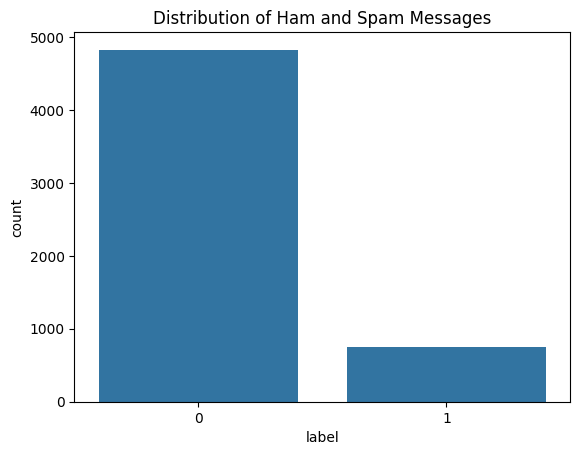

In [15]:
# Plot the distribution of labels
sns.countplot(x='label', data=df)
plt.title('Distribution of Ham and Spam Messages')
plt.show()


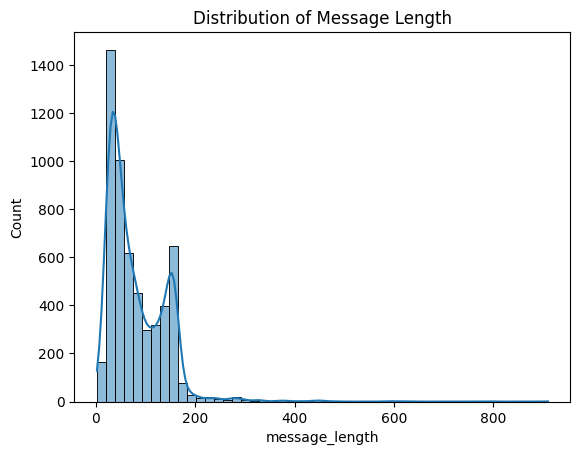

In [16]:
# Plot the length of messages
df['message_length'] = df['message'].apply(len)
sns.histplot(df['message_length'], bins=50, kde=True)
plt.title('Distribution of Message Length')
plt.show()

In [17]:
# Use TfidfVectorizer to convert text data into numerical data
tfidf = TfidfVectorizer(stop_words='english', max_features=3000)
X = tfidf.fit_transform(df['message']).toarray()

In [18]:
# Define target variable
y = df['label']

In [19]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy:.2f}')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

In [21]:
# Naive Bayes
print("Naive Bayes Model")
nb_model = MultinomialNB()
evaluate_model(nb_model, X_train, X_test, y_train, y_test)

Naive Bayes Model
Accuracy: 0.98
Confusion Matrix:
[[965   0]
 [ 20 130]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       1.00      0.87      0.93       150

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [22]:
# Logistic Regression
print("\nLogistic Regression Model")
lr_model = LogisticRegression(max_iter=1000)
evaluate_model(lr_model, X_train, X_test, y_train, y_test)


Logistic Regression Model
Accuracy: 0.96
Confusion Matrix:
[[962   3]
 [ 47 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.69      0.80       150

    accuracy                           0.96      1115
   macro avg       0.96      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



In [23]:
# Support Vector Machine
print("\nSupport Vector Machine Model")
svc_model = SVC()
evaluate_model(svc_model, X_train, X_test, y_train, y_test)


Support Vector Machine Model
Accuracy: 0.98
Confusion Matrix:
[[964   1]
 [ 25 125]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115

